<a href="https://colab.research.google.com/github/smurillo1/Projeto_RoofImoveis/blob/main/RoofImoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto do problema
Roof Imóveis é uma das maiores empresas do ramo imobiliário brasileiro 
e quer expandir sua área de atuação fazendo um investimento internacional.

O objetivo da empresa é investir em imóveis no Condado de King County, nos Estados 
Unidos.

Utilizando o dataset disponibilizado, serão utilizados os conceitos de 
CRISP-DM, que busca desenvolver uma capacidade analítica, insights e tomada de decisões.


# Instalando e importando bibliotecas 

In [ ]:
pip install uszipcode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.3 MB/s 
     |████████████████████████████████| 121 kB 30.8 MB/s 


In [ ]:
pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import sidetable
from uszipcode import SearchEngine
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Exploração dos dados
Foi disponibilizado um dataset com o histórico da comercialização dos imóveis do condado com construção até o ano 2015. A partir disso foi necessário realizar o tratamento e análise desses dados.

In [ ]:
#lendo arquivo
df = pd.read_csv('/content/kc_house_data.csv').reset_index()


# Informação dos dados fornecidos
*   date: data de venda;
*   price: preço de venda;
*   bedrooms: número de quartos;
*   bathrooms: número de banheiros;
*   sqft_living: tamanho da área habitacional em pés²
*   sqft_lot: tamanho do lote em pés²;
*   floors: número de andares;
*   waterfront: ‘1’ se a propriedade for à beira-mar, ‘0’ se não;
*   view: um índice de 0 a 4 do quão bom é a visão da propriedade (imagine 0 para uma propriedade com visão para um beco sujo e 4 para uma propriedade com visão para um lindo parque);
*   condition: condição da casa, com valores de 1 até 5;
*   grade: classificação pela qualidade do material da casa. Construções com melhores materiais normalmente custam mais caro;
*   sqft_above: pés² acima do solo;
*   sqft_basement: pés² abaixo do solo;
*   yr_built: ano de construção;
*   yr_renovated: ano de renovação. ‘0’ se nunca foi renovada;
*   zipcode: código zip de 5 dígitos;
*   lat, long: latitude e longitude;
*   sqft_livng15: tamanho médio das 15 casas mais próximas (em pés²);
*   sqft_lot15: tamanho médio dos lotes das 15 casas mais próximas (em pés²).

A priori, vemos que o dataset possui poucas variavéis o que facilitará o tratamento e a identificação das variáveis mais correlacionadas com nossa variável alvo que será o preço dos imóveis (price).

In [ ]:
#avaliando os dados
df.head()


,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


  Abaixo podemos observar o tipo de cada dado fornecido e começar a ter as primeiras impressões do que será necessário alterar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
#verificando memoria utilizada
memory_usage1 = df.memory_usage().sum()
memory_usage1

3804016

Foi adicionada uma coluna 'city' utilizando a função *SearchEngine*() gerada por meio do *zipcode* que nos foi fornecido.

In [ ]:
#adicionando coluna 'city' e localizando a cidade a partir do zipcode
engine = SearchEngine();
df['city'] = df['zipcode'].map(lambda x: engine.by_zipcode(x).major_city);

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


Exemplo da coluna:

In [ ]:
pd.DataFrame(df['city'].head())

,city
0,Seattle
1,Seattle
2,Kenmore
3,Seattle
4,Sammamish


# Tratando valores
Avaliando o *dataset* acima, nota-se que algumas colunas necessitam de formação. A exemplo da coluna '*date*'. Também foi incluido uma coluna com as cidades, obtidas através da coluna '*zipcode*'.

Já abaixo, foram retirada as colunas que não tenho o intuito de utilizar.

In [ ]:
#excluindo colunas que não serão utilizadas
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('zipcode',axis=1, inplace=True)

Aqui resolvi formatar algumas variáveis com intuito de otimizar o processamento do nosso código. Vejamos:

In [ ]:
#Tratando valores
data_types_dict = {'id':str,'floors':int,'condition':int, 'yr_built':int}
df = df.astype(data_types_dict)

df.dtypes

#alterando coluna 'date' para formato data
df['date'] = pd.to_datetime(df['date'],format='%Y/%m/%d')

#transformando em valores categoricos
categorical_columns = ['view','grade','waterfront','city','yr_renovated']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          21613 non-null  int64         
 1   id             21613 non-null  object        
 2   date           21613 non-null  datetime64[ns]
 3   price          21613 non-null  float64       
 4   bedrooms       21613 non-null  int64         
 5   bathrooms      21613 non-null  float64       
 6   sqft_living    21613 non-null  int64         
 7   sqft_lot       21613 non-null  int64         
 8   floors         21613 non-null  int64         
 9   waterfront     21613 non-null  category      
 10  view           21613 non-null  category      
 11  condition      21613 non-null  int64         
 12  grade          21613 non-null  category      
 13  sqft_above     21613 non-null  int64         
 14  sqft_basement  21613 non-null  int64         
 15  yr_built       2161

In [ ]:
df.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,Seattle
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,Kenmore
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,Seattle
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,Sammamish


In [ ]:
#verificando memoria utilizada
memory_usage2 = df.memory_usage().sum()
f'Memória anterior: {memory_usage1} e Memória atual: {memory_usage2}.'

'Memória anterior: 3804016 e Memória atual: 2705897.'

# Explorando a variável alvo

O objetivo desta análise é concluir quais são os melhores e os piores imóveis para se investir no condado de County, sendo assim, o preço de cada imóvel (variável alvo = *price*) assim como as variáveis **correlacionadas** com o mesmo são os pontos que resolvi focar para atingir o objetivo proposto.

In [ ]:
#Explorando variavel principal
df['price'].describe().reset_index()

,index,price
0,count,2.161300e+04
1,mean,5.400881e+05
2,std,3.671272e+05
3,min,7.500000e+04
4,25%,3.219500e+05
5,50%,4.500000e+05
6,75%,6.450000e+05
7,max,7.700000e+06


Acima, podemos observar as principais informações acerca do preço destes imóveis, no entanto, nota-se que existe uma diferença entre nossa média (mean) e a mediana (50%) o que pode indicar a presença de *outliers*.

Sendo assim, está exposto um boxplot focado na variável *'price'* para confirmar a suspeita.

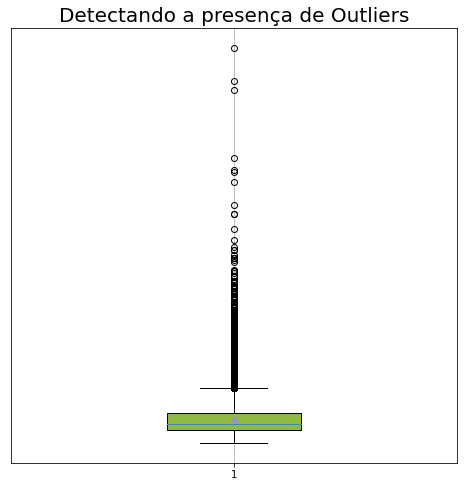

In [ ]:
#Verificando a presença de outliers
plt.figure(figsize=(8,8))

plt.title('Detectando a presença de Outliers', fontsize=20)
plt.style.use('ggplot')

plt.yticks([])
plt.grid()
plt.boxplot(x=df['price'], widths=0.3, patch_artist=True, boxprops=dict(facecolor="C5"), showmeans=True);


Conclui-se então que há uma forte presença desses outliers, elevando a média da variável para cima. Por isso, resolvi trabalhar com a mediana por passar uma segurança maior do que realmente nos trazem esses dados.


# Correlação de variáveis
Como dito anteriormente, foi realizada a correlação entre os valores numéricos do nosso dataset, com intuito de observar as variáveis que irão auxiliar nossa variável alvo.

In [ ]:
df.corr()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
index,1.000000,0.027372,0.010794,0.107334,0.044717,-0.026877,0.185053,-0.095419,0.071958,-0.041841,0.199549,0.026647,-0.029827
price,0.027372,1.000000,0.308350,0.525138,0.702035,0.089661,0.237211,0.036362,0.605567,0.323816,0.054012,0.585379,0.082447
bedrooms,0.010794,0.308350,1.000000,0.515884,0.576671,0.031703,0.155643,0.028472,0.477600,0.303093,0.154178,0.391638,0.029244
bathrooms,0.107334,0.525138,0.515884,1.000000,0.754665,0.087740,0.519019,-0.124982,0.685342,0.283770,0.506019,0.568634,0.087175
sqft_living,0.044717,0.702035,0.576671,0.754665,1.000000,0.172826,0.353321,-0.058753,0.876597,0.435043,0.318049,0.756420,0.183286
sqft_lot,-0.026877,0.089661,0.031703,0.087740,0.172826,1.000000,-0.008951,-0.008958,0.183512,0.015286,0.053080,0.144608,0.718557
floors,0.185053,0.237211,0.155643,0.519019,0.353321,-0.008951,1.000000,-0.293173,0.517913,-0.235836,0.578619,0.296561,-0.013252
condition,-0.095419,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.293173,1.000000,-0.158214,0.174105,-0.361417,-0.092824,-0.003406
sqft_above,0.071958,0.605567,0.477600,0.685342,0.876597,0.183512,0.517913,-0.158214,1.000000,-0.051943,0.423898,0.731870,0.194050
sqft_basement,-0.041841,0.323816,0.303093,0.283770,0.435043,0.015286,-0.235836,0.174105,-0.051943,1.000000,-0.133124,0.200355,0.017276


Após observar a tabela, foi possível selecionar melhor algumas variáveis e realizar o estudo de sua correlação com auxilio de um mapa de calor *(heatmap)*.

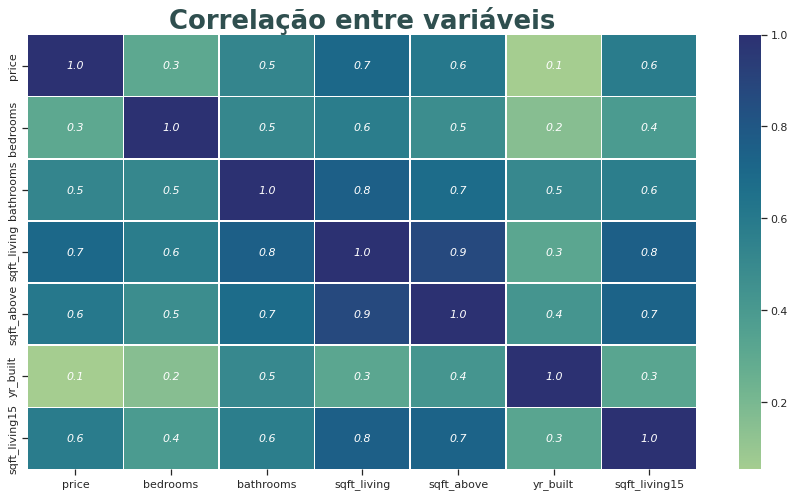

In [ ]:
#Estabelecendo correlação entre variáveis contínuas
annot_kws={'fontsize':11, 
           'fontstyle':'italic',  
           'color':"w",
           'alpha':1,
           'horizontalalignment':'center'}

sns.set(rc={'figure.figsize':(15,8), 'figure.facecolor':'white'})
sns.set_style("ticks")
plt.title('Correlação entre variáveis', fontsize=26, fontweight='bold',color='#2F4F4F');

new_df = df[['date','price','bedrooms','bathrooms','sqft_living', 'grade', 'sqft_above','yr_built', 'yr_renovated','sqft_living15']]
#utlizando variaveis contínuas para realizar a correlação de Pearson (r)
sns.heatmap(new_df.corr(),annot=True, annot_kws = annot_kws, fmt='.1f', linewidth=.5, cmap='crest');


A partir da correlação fica exposto as variáveis que iremos explorar no decorrer desta análise. O critério adotado para esta seleção foi possuir uma correlação com a coluna *'price'* acima de 0.5. 

Vale salientar que, como exceção, a coluna *'bedrooms'* também está incluida nesta análise por considerar que possui uma correlação importante com a variável *'bathrooms'*. O que poderá nos render algum fruto no fim desta análise.

# Frequência de variáveis que podem aumentar o preço
Analisando *'bedrooms'* e *'bathrooms'* observa-se que há uma maior concentração de imóveis com 2 a 5 quartos e de 1 a 3 banheiros. E como a variável bathrooms tem correlação acima de 0.5 com o preço (*price*) podemos entender que o número deste cômodo implicará na valorização do imóvel.

Já quando falamos de área de habitação é possível observar uma concentração entre 2000 e 6000 ft² juntamente a um aumento de preço entre esses imóveis.

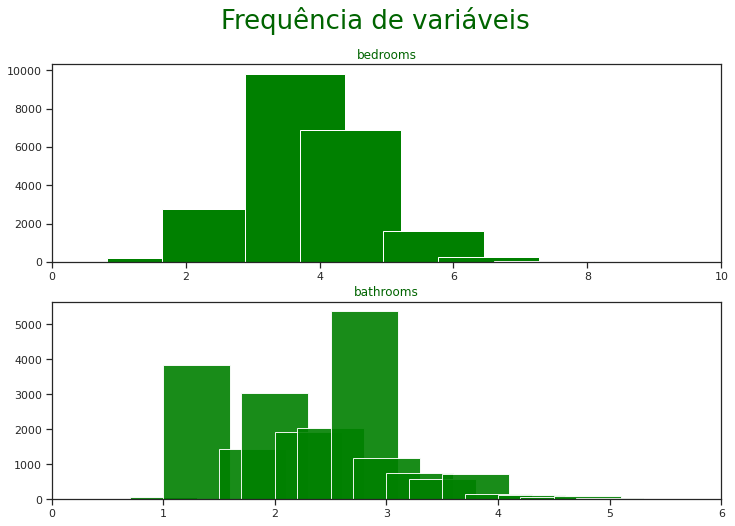

In [ ]:
#Analisando frequencias de bedrooms e bathrooms 
fig, (ax1,ax2) = plt.subplots(2,1,subplot_kw=dict(), figsize=(12,8))
fig.suptitle('Frequência de variáveis', fontsize=26, color='#006400')

ax1.hist(df['bedrooms'],bins=80, alpha=1, width=1.5, color='#008000');
ax2.hist(df['bathrooms'],bins=80, alpha=0.9, width=0.6, color='#008000');

ax1.set_title('bedrooms',color='#006400');
ax1.set_xlim(0,10)
ax2.set_title('bathrooms',color='#006400');
ax2.set_xlim(0,6);

plt.style.use('ggplot');

Para entender melhor o quanto essas variáveis irão implicar no preço, vamos utiliziar os gráficos de dispersão para observar como se dá a relação entre as variáveis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


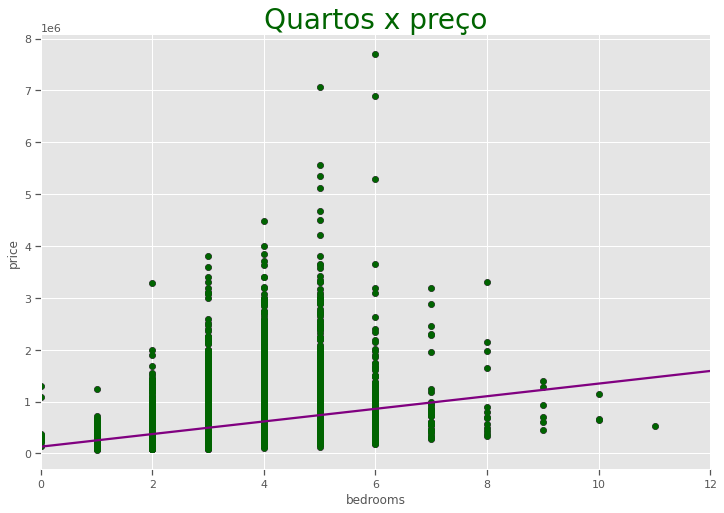

In [ ]:
#tamanho da figura
plt.figure(figsize=(12,8))

#plotando gráficos
sns.regplot(df['bedrooms'], df['price'], ci=None, color='purple');
plt.scatter(df['bedrooms'], df['price'],color='#006400');

#título principal
plt.title('Quartos x preço', fontsize=28, color='#006400')

#ajustando escala
plt.xlim(0,12);

#entitulando eixos
plt.xlabel('bedrooms')
plt.ylabel('price')

#escolhendo background
plt.style.use('ggplot');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


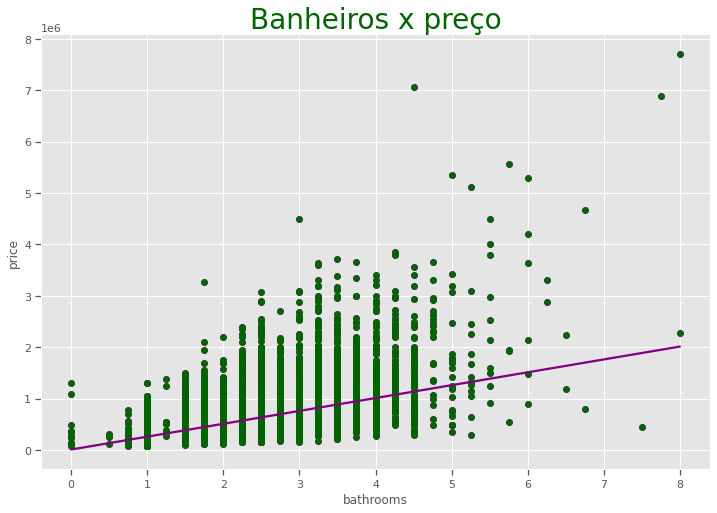

In [ ]:
#tamanho da figura
plt.figure(figsize=(12,8))

#plotando gráficos
sns.regplot(df['bathrooms'], df['price'], ci=None, color='purple');
plt.scatter(df['bathrooms'], df['price'],color='#006400');

#título principal
plt.title('Banheiros x preço', fontsize=28, color='#006400')

#entitulando eixos
plt.xlabel('bathrooms')
plt.ylabel('price')

#escolhendo background
plt.style.use('ggplot');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


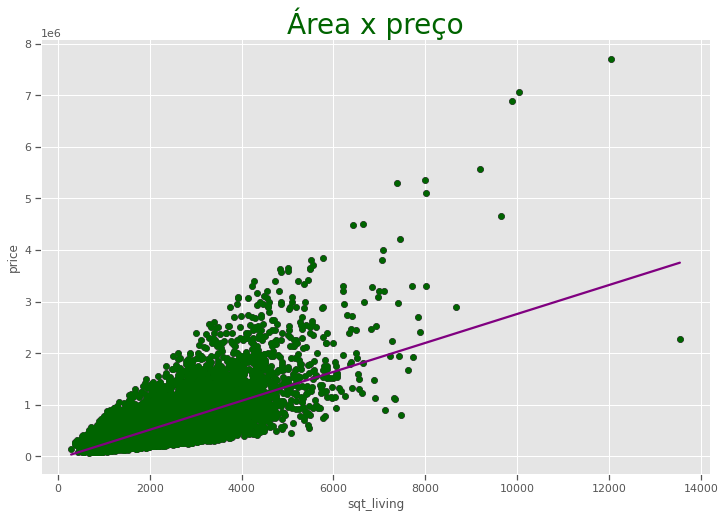

In [ ]:
#tamanho da figura
plt.figure(figsize=(12,8))

#plotando gráficos
sns.regplot(df['sqft_living'], df['price'], ci=None, color='purple');
plt.scatter(df['sqft_living'], df['price'], color='#006400');

#título principal
plt.title('Área x preço', fontsize=28, color='#006400')

#entitulando eixos
plt.xlabel('sqt_living')
plt.ylabel('price')

#escolhendo background
plt.style.use('ggplot');

A partir dos gráficos *'scatter'* expostos acima, podemos observar que existe uma valorização entre os imóveis que possuem de 3 a 6 quartos.

Já quando tratamos dos banheiros, há uma peculiaridade na forma como os americanos classificam os banheiros em seus imóveis podendo variar desde meio banheiro (vaso sanitário e pia) até um banheiro completo (pia, banheira, chuveiro e vaso). Sendo assim podemos notar a presença de alguns valores *'float'* em nosso gráfico de dispersão. No entanto, podemos observar uma crescente na valorização dos imóveis a partir 1,5 para 2 banheiros.

Entre a área, confirmamos o que foi citado anteriormente, há uma relação entre o aumento da área e o aumento do valor do imóvel, sendo proporcionais.

# Variáveis que não impactam no preço
Existem algumas variáveis fornecidas que por mais que classifiquem os imóveis de alguma forma, não impactam fortemente nos seus preços. Vejamos abaixo:



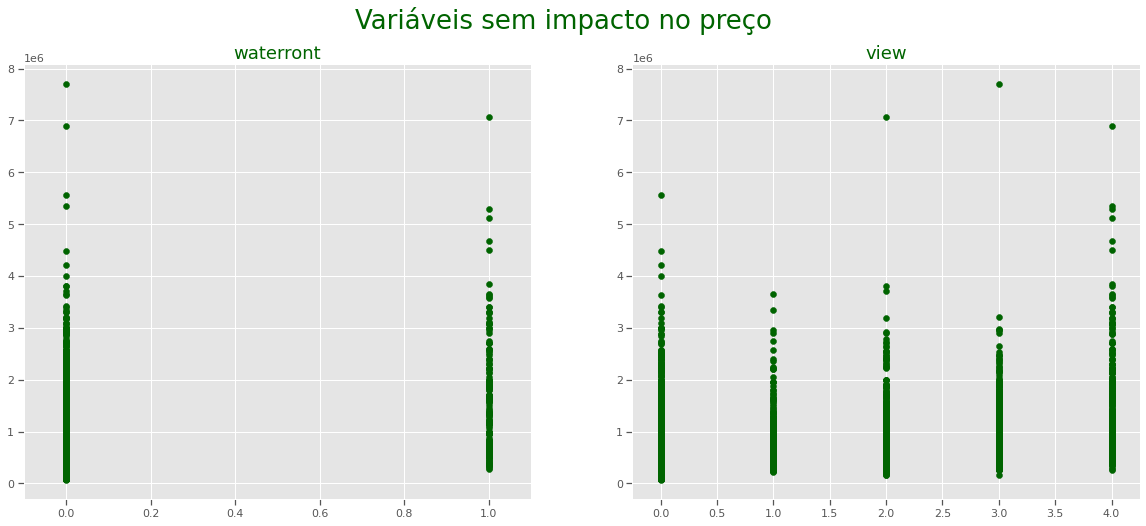

In [ ]:
#declarando subplots
fig, (ax1,ax2) = plt.subplots(1,2,subplot_kw=dict(), figsize=(20,8))

#entitulando eixos
fig.suptitle('Variáveis sem impacto no preço', fontsize=26, color='#006400')

#plotando gráficos
ax1.scatter(df['waterfront'],df['price'], color='#006400');
ax2.scatter(df['view'], df['price'], color='#006400');

#entitulando e ajustando escalas dos eixos
ax1.set_title('waterront',fontsize=18, color='#006400');
ax1.set_xlim(-0.1,1.1)
ax2.set_title('view',fontsize=18, color='#006400');
ax2.set_xlim(-0.25,4.25);

plt.style.use('ggplot');



É possível notarmos que embora ambas as variáveis variem dentro de sua classificação as casas chegam até o valor de 4.000.000 independente das características apresentadas por ambas.

# Preço do ft²
Para chegar nesse valor decidi observar duas variáveis que estavam presentes em nossa correlação anterior, sendo elas: *'sqft_living'* e *'sqft_living15'* (tamanho do terreno habitável e tamanho do terreno habitável dos 15 imóveis vizinhos). 


In [ ]:
#coletando informações das variáveis
number_describe = df.select_dtypes('number').describe()
number_describe[['price','sqft_living','sqft_living15']].loc[(['mean','50%'])].reset_index()

,index,price,sqft_living,sqft_living15
0,mean,540088.141767,2079.899736,1986.552492
1,50%,450000.000000,1910.000000,1840.000000


Através do describe() foi possível observar a media e mediana da área desses imóveis e ver que elas estão bem próximas, no entanto, devido a presença de outliers já citados, resolvi utilizar a mediana da variável 'sqft_living15' para chegar até valor do preço por ft² a título de uma melhor precisão.

In [ ]:
#relacionando o preço
price_ft = df['price'].median() / df['sqft_living15'].median() 
f'Preço do ft² no condado de County: ${price_ft:.2f}/ft²'

'Preço do ft² no condado de County: $244.57/ft²'

Com intuito de verificar as cidades do condado, decidi calcular quanto custa o ft² em cada cidade para ter uma melhor noção de onde estão os ft² mais e menos valorizados.

Antes disso, é necessário verificarmos o volume de habitações por cada cidade do condado, elenquei aqui as 5 com maior número de imóveis comercializados, o que pode render uma futura zona de investimento para a Roof imóveis.

In [ ]:
#Analisando o df podemos observar que um dos melhores lugares para se realizar investimentos em imoveis é a região de seattle, seguida por Renton, Bellevue e Kent
count_city = df['city'].value_counts().sort_values(ascending=False).reset_index().head(4)
count_city

,index,city
0,Seattle,8977
1,Renton,1597
2,Bellevue,1407
3,Kent,1203


Vemos então que Seattle é disparada a cidade com maior quantidade de imóveis. Seguida por Renton, Bellevue e Kent. 

Observemos graficamente o valor do ft² por cada cidade do condado, focando também, nas cidades destacadas acima por terem maior número de imóveis.

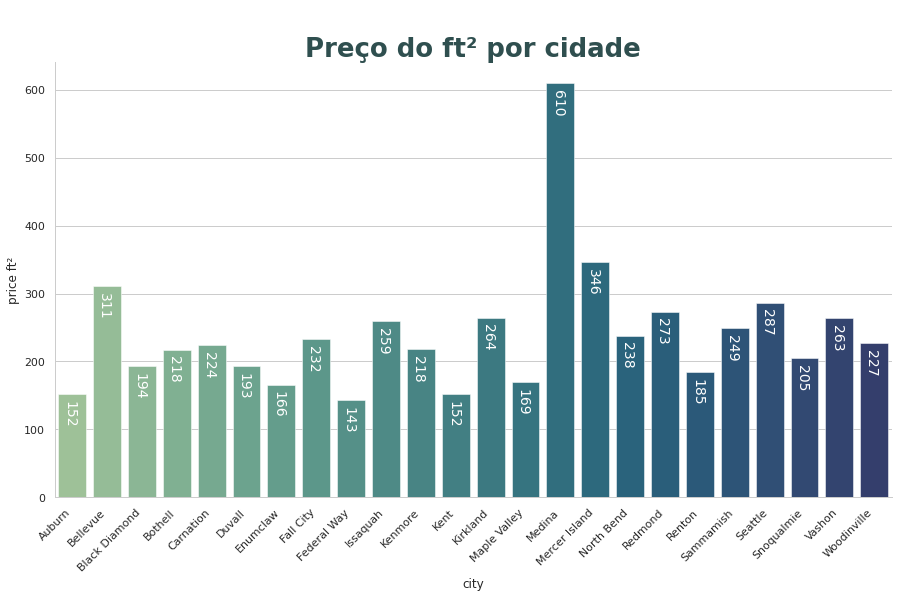

In [ ]:
#calculando o preço do ft² por cidade

#agrupando variavel city por area e preço
city_group = df.groupby(['city']).sqft_living15
city_price = df.groupby(['city']).price

#calculando relação entre variaveis agrupadas
median_price_ft = city_price.median() / city_group.median()
result = median_price_ft.reset_index()
#renomeando colunas
result.rename(columns={0: 'median_price'}, inplace=True)
result

#plotando grafico
sns.set_style('whitegrid')

graf = sns.barplot(data=result, x=result['city'], y=result['median_price'], palette='crest');
plt.title('\nPreço do ft² por cidade',fontsize=26, fontweight='bold', color='#2F4F4F', fontfamily='arial')
sns.despine()

plt.ylabel('price ft²')

graf.figure.set_size_inches(15, 8)
graf.set_xticklabels(graf.get_xticklabels(), rotation=45, horizontalalignment='right');

#adicionando rótulos
for i in graf.patches:
  h = i.get_height()
  graf.annotate('{:.0f}'.format(h), 
                (i.get_x() + i.get_width()/2.5, i.get_height()-45),
                ha='center',va='baseline', rotation=270, fontsize=14, xytext=(0, 1),
                color = 'w', textcoords='offset points')


Conclusão: Quatro cidades possuem alto índice de imóveis vendidos (Seattle, Renton, Bellevue e Kent) - Seattle é a cidade com maior índice de imóveis, devido a ser a principal cidade do condado e possuir a maior população.

Em relação ao preço do ft², Bellevue possui o ft² mais valorizado entre as quatro cidades citadas, seguidas por Seattle, Renton e Kent. Sendo as duas últimas mais subvalorizadas. 

A partir desta análise minha recomendação é focar prioritariamente na comercialização em Seattle e em seguida Bellevue e Renton.

# Imóveis revendidos
Estão presentes em nosso dataset duplicadas encontradas na variável *'id'*, as mesmas correspondem a imóveis que já foram revendidos. Sabendo disso, agruparei esses imóveis e calcularei lucro/prejuizo entre essas vendas.

Agrupando esses valores e ordenando pela coluna *'id'*, foi possível confirmar que realmente se tratam de imóveis revendidos, já que a data de venda e o preço diferem.

Abaixo foram utilizados o cálculo da diferença entre os valores de venda desses imóveis revendidos e gerado um novo dataframe com eles.

In [ ]:
#separando a coluna id em um novo df
id = df['id']
#agrupando as duplicadas em ordem e gerando um df com id, price e date
duplicates_df = df[id.isin(id[id.duplicated()])]
a = duplicates_df[['id','price','date']].sort_values(['id','date']).reset_index()

#criação de duas listas - uma contendo os ids e outra vazia 
list_id = duplicates_df['id'].tolist()
list_df = []

for id in list_id:
  list_df.append(a[a['id']==id].reset_index())
lucros = {}
lucros['id']=[]
lucros['price']=[]

for df_s in list_df:
  sum = 0
  serie_s = df_s['price']
  for i in range(1,len(df_s)):
    sum += serie_s[i]-serie_s[i-1]

  lucros['id'].append(df_s['id'][0])
  lucros['price'].append(sum)

df_lucros = pd.DataFrame.from_dict(lucros)
df_lucros.drop_duplicates(inplace=True)
df_lucros

,id,price
0,6021501535,270000.0
2,4139480200,16000.0
4,7520000520,8500.0
6,3969300030,74900.0
8,2231500030,215000.0
...,...,...
343,7853400250,35000.0
345,2724049222,56200.0
347,8564860270,52010.0
349,6300000226,140000.0


# Prejuízo - revenda

Aqui estão expostos os imóveis que apresentaram prejuízo durante suas revendas e uma breve explicação do motivo da desvalorização junto a uma recomendação de não investimento nos mesmos.

Text(0.5, 1.0, '\nImóveis que geraram prejuízo')

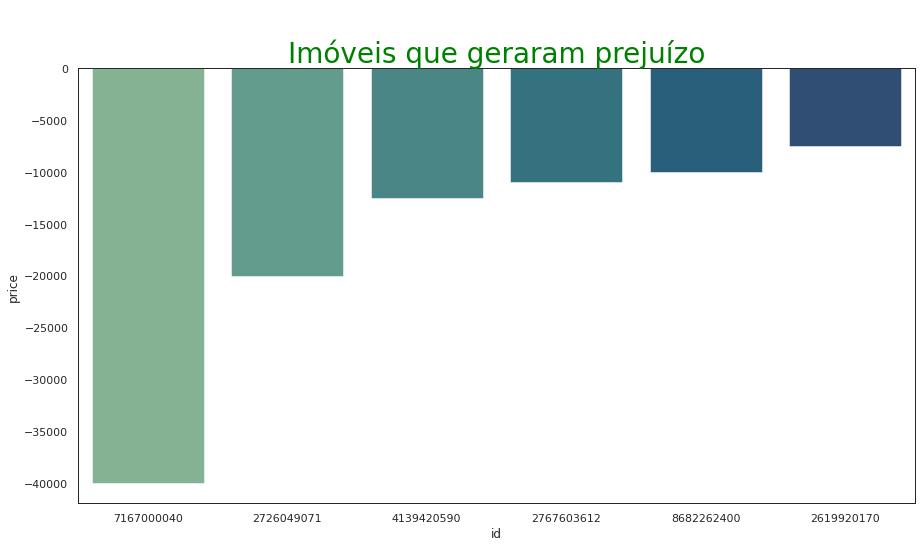

In [ ]:
#localizando imóveis com prejuizo
prejuizo = df_lucros.loc[(df_lucros['price']<0)]
prejuizo.sort_values(['price'], ascending=True)

sns.set_style('white')
sns.barplot(data=prejuizo, x='id', y=prejuizo['price'], order=prejuizo.sort_values('price').id, palette='crest')
plt.title('\nImóveis que geraram prejuízo', fontsize=28, color='Green')


In [ ]:
analise_preju = duplicates_df['id'].isin(['8682262400','2726049071','4139420590','2767603612','7167000040','2619920170'])
novo_preju = duplicates_df[analise_preju].head(20).drop_duplicates('id')
novo_preju

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city
836,836,8682262400,2014-07-18,430000.0,2,1.75,1350,4003,1,0,0,3,8,1350,0,2004,0,1350,4479,Redmond
5592,5592,2726049071,2014-12-11,510000.0,2,1.00,820,4206,1,0,0,3,5,820,0,1949,0,1810,7200,Seattle
7845,7845,4139420590,2014-05-20,1212500.0,4,3.50,4560,16643,1,0,3,3,12,2230,2330,1995,0,4060,15177,Bellevue
10610,10610,2767603612,2014-05-12,500000.0,2,2.25,1290,1334,3,0,0,3,8,1290,0,2007,0,1350,1334,Seattle
13298,13298,7167000040,2014-08-13,740000.0,4,3.00,3350,199253,2,0,0,3,10,3350,0,2004,0,3350,183897,Black Diamond
15277,15277,2619920170,2014-10-01,772500.0,4,2.50,3230,4290,2,0,0,3,9,3230,0,2004,0,3220,5083,Kirkland


Conclui-se que os imóveis que foram revendidos e apresentaram prejuízo tem pelo menos 15 anos desde sua construção e não passaram por nenhuma reforma desde então. Os mesmos variam com andares e banheiros entre 1 e 3 e a maioria não possui vista acima de 0 - o que desvaloriza mais ainda os imóveis. Sendo assim, classifico os mesmo como imóveis para não se investir até que seja realizada uma reforma.

# Lucro - revenda
Agora chegou o momento de observamos a valorização dos imóveis revendidos e para isso faremos uma análise em cima dos 10 imóveis que mais valorizaram com o passar do tempo.

In [ ]:
#localizando imóveis com lucro
ganho = df_lucros.loc[(df_lucros['price']>0)]

#ordenando valores
top10_ganhos = df_lucros.sort_values(['price'],ascending=False).head(10)

#tabela completa de ganhos
analise_ganho = duplicates_df['id'].isin(['6021500970','7977201065','7409700215','4443800385','2568300045',
                                          '2023049218','1568100300','3558900590','3333002450','6141100320'])
novo_ganho = duplicates_df[analise_ganho].head(20)
novo_ganho.drop_duplicates('id').sort_values(['price'], ascending=False)

#ordenando ganhos
df_lucros.sort_values(['price'], ascending=False).head()

,id,price
337,6021500970,529950.0
140,7977201065,390000.0
52,7409700215,371500.0
154,4443800385,368100.0
164,2568300045,344950.0


Quanto a valorização dos imóveis que geraram lucro, analisando a tabela acima, podemos concluir que há uma tendência na compra de imóveis menores concentrados na região de Seattle. Um ponto interessante é que são imóveis bem antigos e apenas 1 andar. Como parece apresentar um comportamento padrão, recomendo uma maior atenção com os imóveis deste tipo pois pode se colocar como um bom investimento nos próximos anos, principalmente em Seattle.

# Estabelecendo um critério de aquisição

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


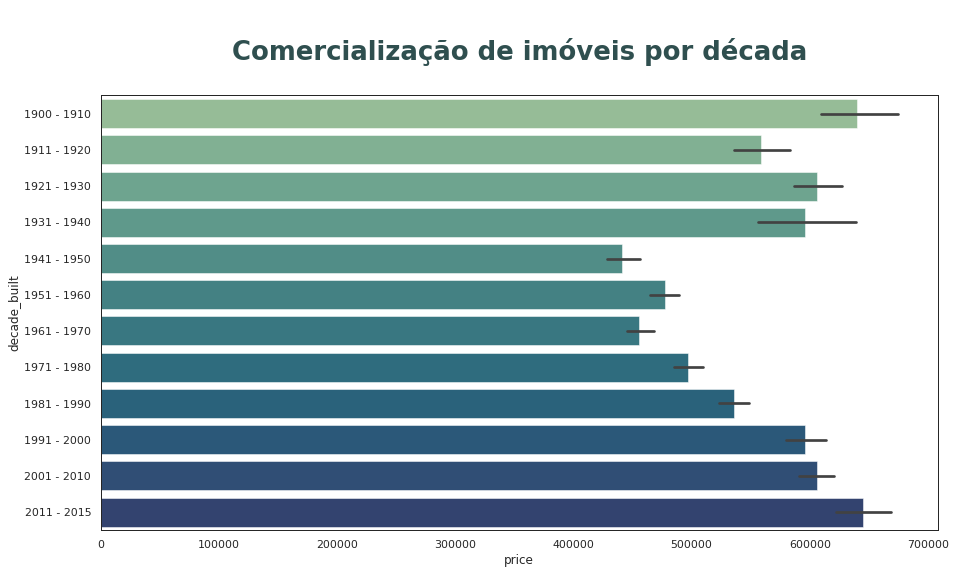

In [ ]:
#agrupando anos em décadas
dates = pd.DataFrame(df['yr_built'], columns=['yr_built'])
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
labels = ['1900 - 1910', '1911 - 1920', '1921 - 1930', '1931 - 1940', '1941 - 1950', '1951 - 1960', '1961 - 1970', '1971 - 1980',
         '1981 - 1990', '1991 - 2000', '2001 - 2010', '2011 - 2015']
df['decade_built'] = pd.cut(dates['yr_built'], bins, labels = labels, include_lowest = True)

#plotando comercialização por década
plt.title('\nComercialização de imóveis por década\n',fontsize=26, fontweight='bold', color='#2F4F4F', fontfamily='arial');
sns.barplot(df['price'],df['decade_built'],palette='crest');

Nota-se uma variação de preços ao longo do tempo que após uima forte queda no início da década de 1940, voltara a crescer em meados de 1960.

In [ ]:
#analisando quantidade e preços por condição
col_condition = pd.DataFrame(df['condition'].value_counts().sort_index())
col_condition

price_condition = pd.DataFrame(df.groupby(['condition']).price.median())
price_condition['Count'] = col_condition
price_condition.reset_index(drop=False)

,condition,price,Count
0,1,262500.0,30
1,2,279000.0,172
2,3,450000.0,14031
3,4,440000.0,5679
4,5,526000.0,1701


Vemos que existem pouquíssimos imóveis com baixas condições e que há uma valorização entre os imóveis com condição a partir de '3'.

Sendo assim, é chegado o momento de escolher o critério que estabelecerá os imóveis selecionados para investirmos. Vejamos:

1.   Preço (*price*) - nossa variável alvo durante todo o processo, buscaremos oportunidades com bom custo/benefício (e/ou abaixo da média de preço);

2.   Estar situado na região metropolitana de Seattle - em razão da alta concentração de imóveis negociados devido ao número da sua população;

3.   Ter condição a partir de 3 - imóveis com este tipo de condição nos fornecerão uma melhor segurança em relação a custo/benefício (de acordo com o censo nacional realizado em 2020, a cidade de Seattle teve um crescimento populacional de 21.1% na última década, tendo em média 2.1 pessoas por residência);

4.   Período de construção (*decade_built*) - vimos anteriormente que houve um período em que o mercado de imóveis teve uma baixa significativa no condado e por não conhecermos o motivo iremos fugir deste tipo de propriedades;

5.   Número de banheiros - quartos, qualidade do material e tamanho da área habitável serão utilizados como critério de desempate entre os imóveis.




In [ ]:
#formando critério de compra e filtrando dados
criterio = df[['id','price','city','condition','bedrooms','bathrooms','sqft_living','grade','yr_built','decade_built']]
criterio_seattle = criterio[(criterio['city'].str.contains('Seattle|Bellevue'))].sort_values(['price','condition'],ascending=True).loc[(criterio['condition']>2)].loc[(criterio['yr_built']>=1990)].sort_values('yr_built', ascending = False)
criterio_seattle.drop_duplicates(subset='id', keep = 'last', inplace = True)

prices = pd.DataFrame(criterio_seattle['price'], columns=['price'])
bins = [0, 250000, 500000, 1000000, 8000000]
labels = ['D','C' ,'B', 'A']
criterio_seattle['price group'] = pd.cut(prices['price'], bins, labels = labels, include_lowest = True)
criterio_seattle

,id,price,city,condition,bedrooms,bathrooms,sqft_living,grade,yr_built,decade_built,price group
21262,5694500840,559000.0,Seattle,3,2,3.00,1650,8,2015,2011 - 2015,B
14215,8156600210,1285000.0,Seattle,3,5,3.50,2980,10,2015,2011 - 2015,A
21316,6600000050,1698000.0,Seattle,3,4,3.50,3950,11,2015,2011 - 2015,A
20311,7132300525,500000.0,Seattle,3,3,1.75,1530,8,2015,2011 - 2015,C
643,9385200045,729500.0,Seattle,3,3,2.50,1660,9,2015,2011 - 2015,B
...,...,...,...,...,...,...,...,...,...,...,...
14637,9269200120,415000.0,Seattle,3,3,2.50,1710,7,1990,1981 - 1990,C
7045,8965400010,715000.0,Bellevue,3,3,2.50,2550,9,1990,1981 - 1990,B
7710,644200040,1000000.0,Bellevue,3,5,4.25,3920,9,1990,1981 - 1990,B
1932,9188200570,333800.0,Seattle,3,5,3.00,1980,7,1990,1981 - 1990,C


Para atingirmos o objetivo da Roof Imóveis, decidi classficar os imóveis por faixa de preço - podendo variar em classes de A a D.


1.   Classe A: acima de 1.000.000 dólares
2.   Classe B: acima de 500.000 a 1.000.000 dólares
3.   Classe C: de 250.000 a 500.000 dólares
2.   Classe D: de 0 a 250.000 dólares





In [ ]:
#preço de compra por classe 
criterio_seattle['price group'].value_counts().reset_index()

,index,price group
0,C,1022
1,B,759
2,A,312
3,D,63


No *dataframe* acima foram filtradas os critérios adotados para refinar nossa análise e chegar até o objetivo final. Com isso, defini que a melhor estratégia é focar nos imóveis que estão dentro das classes B e C e que foram construídos a partir de 1990 - momento onde o mercado volta a crescer na região e tem um padrão de construção mais atual (com pelo menos 2 banheiros e de 3 a 5 quartos).


In [ ]:
#tabela filtrada
invest = criterio_seattle[(criterio_seattle['price group'].str.contains('B|C'))].sort_values(['yr_built', 'price'], ascending=False)
invest

,id,price,city,condition,bedrooms,bathrooms,sqft_living,grade,yr_built,decade_built,price group
20487,9103000455,920000.0,Seattle,3,4,3.25,2190,9,2015,2011 - 2015,B
21432,7104100110,899000.0,Seattle,3,4,3.50,2490,9,2015,2011 - 2015,B
20881,3052700385,765000.0,Seattle,3,4,2.25,2030,9,2015,2011 - 2015,B
643,9385200045,729500.0,Seattle,3,3,2.50,1660,9,2015,2011 - 2015,B
19722,9161100075,673000.0,Seattle,3,4,2.25,2580,9,2015,2011 - 2015,B
...,...,...,...,...,...,...,...,...,...,...,...
1932,9188200570,333800.0,Seattle,3,5,3.00,1980,7,1990,1981 - 1990,C
1178,7893800335,328000.0,Seattle,3,4,3.25,3380,7,1990,1981 - 1990,C
12815,3298700156,310000.0,Seattle,3,3,2.50,1780,7,1990,1981 - 1990,C
19228,3600600065,279950.0,Seattle,4,3,1.50,1520,7,1990,1981 - 1990,C


(1.0, 2.5)

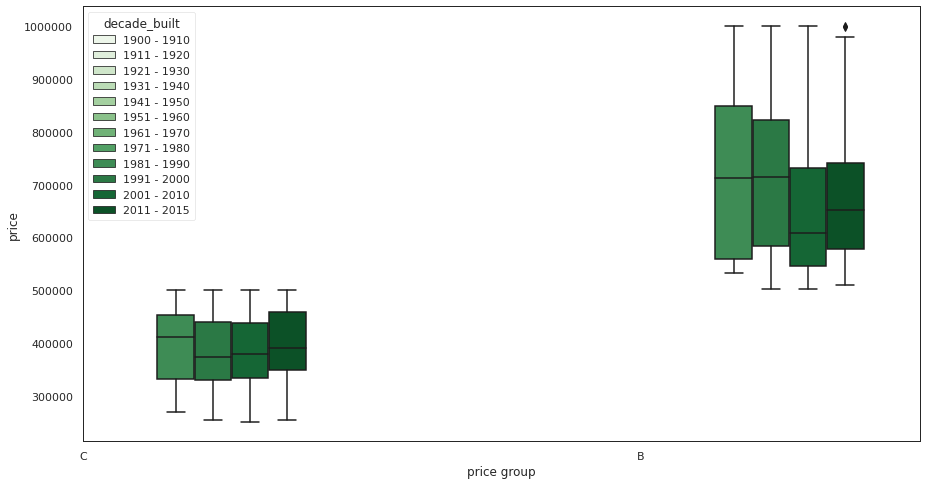

In [ ]:
sns.boxplot(data=invest, x='price group', y='price', hue='decade_built', palette='Greens');
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(1,2.5)

Acima observa-se que para a classe C - a prioridade serão os imóveis presentes de 1991 a 2000 e 2001 a 2010, devido a apresentarem os menores preços para investimento. Já para os imóveis da classe B, serão priorizados os imóveis de 2001 a 2015.

# Imóveis escolhidos

## Para investir

A título de investimento eu diria que os imóveis contidos no dataframe acima são bons investimentos de acordo com cada tipo de perfil. Porém como objetivo proposto pela Roof imóveis é chegar a 5 indicações, decidi selecionar os 3 melhores imóveis (de acordo com o critério estabelecido) na classe C (por ter um maior número de habitações e levando em consideração a lei da oferta e demanda é possível que tenha uma maior procura por esse tipo de imóvel) e os 2 melhores imóveis da classe B.

Para a classe C selecionarei 3 imóveis com as seguintes configurações: 2 quartos, 2 banheiros, condição 3, área até 2500 e construídos entre 1991 e 2000.

Para a classe B o perfil será um pouco diferente, pois meu público alvo serão as famílias com pelo menos 3 pessoas. Logo, condição 3, +3 quartos, +2.5 banheiros, área acima de 2400 e construídos entre 2001 e 2015.

O diferencial entre esses imóveis é a variável price (preço).

A 

In [ ]:
classe_b = criterio_seattle[(criterio_seattle['price group'].str.contains('B'))].sort_values(['price'], ascending=True).loc[(criterio_seattle['condition']>2)].loc[(criterio_seattle['bedrooms']>=3)].loc[(criterio_seattle['bathrooms']>2)].loc[(criterio_seattle['yr_built']>2000)].loc[(criterio_seattle['sqft_living']>=2400)]
classe_b.head(2)

,id,price,city,condition,bedrooms,bathrooms,sqft_living,grade,yr_built,decade_built,price group
1382,8681660060,503000.0,Seattle,3,4,2.5,2470,9,2005,2001 - 2010,B
1147,6332940070,510000.0,Seattle,3,4,2.5,2430,8,2003,2001 - 2010,B


In [ ]:
classe_c = criterio_seattle[(criterio_seattle['price group'].str.contains('C'))].sort_values(['price'], ascending=True).loc[(criterio_seattle['condition']>2)].loc[(criterio_seattle['bedrooms']>=2)].loc[(criterio_seattle['bathrooms']>2)].loc[(criterio_seattle['sqft_living']>=2400)].loc[(criterio_seattle['decade_built']=='1991 - 2000')]
classe_c.head(3)

,id,price,city,condition,bedrooms,bathrooms,sqft_living,grade,yr_built,decade_built,price group
12907,2113700360,315000.0,Seattle,4,6,4.00,3120,7,1993,1991 - 2000,C
10820,1099900030,325000.0,Seattle,3,5,2.75,2400,7,1992,1991 - 2000,C
14227,5379800862,360000.0,Seattle,3,5,3.00,2480,7,1999,1991 - 2000,C


In [ ]:
#imóveis recomendados
recomendados = criterio_seattle['id'].isin(['8681660060','6332940070','2113700360','1099900030','5379800862'])
criterio_seattle[recomendados]

,id,price,city,condition,bedrooms,bathrooms,sqft_living,grade,yr_built,decade_built,price group
1382,8681660060,503000.0,Seattle,3,4,2.50,2470,9,2005,2001 - 2010,B
1147,6332940070,510000.0,Seattle,3,4,2.50,2430,8,2003,2001 - 2010,B
14227,5379800862,360000.0,Seattle,3,5,3.00,2480,7,1999,1991 - 2000,C
12907,2113700360,315000.0,Seattle,4,6,4.00,3120,7,1993,1991 - 2000,C
10820,1099900030,325000.0,Seattle,3,5,2.75,2400,7,1992,1991 - 2000,C


Os imóveis foram escolhidos visando o preço como variável principal, seguidos pelo tamanho da área e ano de construção. Imóveis mais novos no condado de King County acompanham os padrões de crescimento do mercado na área. 

## Para fugir

Entre os 5 imóveis para não investir elenco os imóveis que possuem condição igual ou inferior a 2, 1 quarto, 1 banheiro ou menos, qualidade de materiais (grade) inferior a 6, ano de construção inferior a 1990, área inferior a 1000 ft² e que prioritariamente estejam mais afastados de Seattle.

In [ ]:
#imóveis para não comprar
nao_recomendados = criterio['id'].isin(['8658300340','5702500050','4008400515','3980300371','6303400395'])
criterio[nao_recomendados]

,id,price,city,condition,bedrooms,bathrooms,sqft_living,grade,yr_built,decade_built
465,8658300340,80000.0,Carnation,2,1,0.75,430,4,1912,1911 - 1920
5832,5702500050,280000.0,North Bend,2,1,0.00,600,3,1950,1941 - 1950
7636,4008400515,190000.0,Renton,1,1,0.75,780,5,1945,1941 - 1950
8623,6303400395,325000.0,Seattle,2,1,0.75,410,4,1953,1951 - 1960
19452,3980300371,142000.0,Fall City,1,0,0.00,290,1,1963,1961 - 1970
